In [80]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [81]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")

In [82]:
df.head(12)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [84]:
value_counts = df['CS-412'].value_counts()
value_counts

A-    157
B+     80
A      77
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: CS-412, dtype: int64

In [85]:
df = df.fillna(df.mode().iloc[0])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le = LabelEncoder()


In [89]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

In [90]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [91]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    int32  
 1   PH-121     571 non-null    int32  
 2   HS-101     571 non-null    int32  
 3   CY-105     571 non-null    int32  
 4   HS-105/12  571 non-null    int32  
 5   MT-111     571 non-null    int32  
 6   CS-105     571 non-null    int32  
 7   CS-106     571 non-null    int32  
 8   EL-102     571 non-null    int32  
 9   EE-119     571 non-null    int32  
 10  ME-107     571 non-null    int32  
 11  CS-107     571 non-null    int32  
 12  HS-205/20  571 non-null    int32  
 13  MT-222     571 non-null    int32  
 14  EE-222     571 non-null    int32  
 15  MT-224     571 non-null    int32  
 16  CS-210     571 non-null    int32  
 17  CS-211     571 non-null    int32  
 18  CS-203     571 non-null    int32  
 19  CS-214     571 non-null    int32  
 20  EE-217    

In [93]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


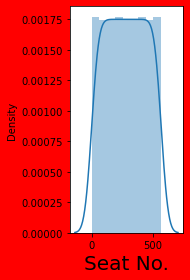

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


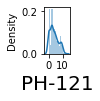

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


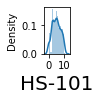

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


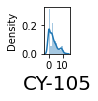

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


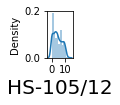

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


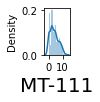

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


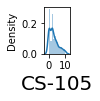

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


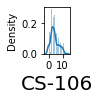

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


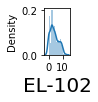

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


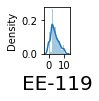

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


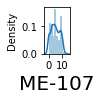

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


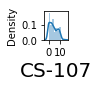

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


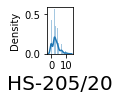

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


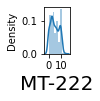

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


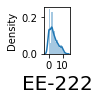

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


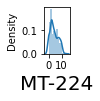

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


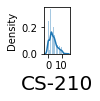

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


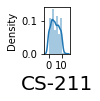

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


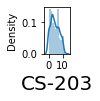

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


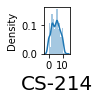

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


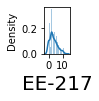

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


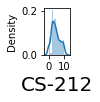

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


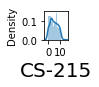

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


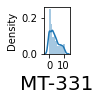

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


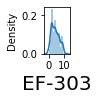

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


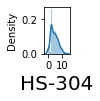

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


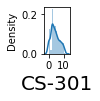

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


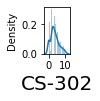

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


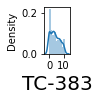

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


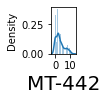

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


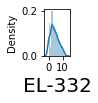

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


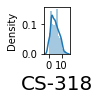

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


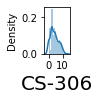

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


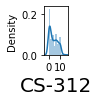

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


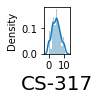

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


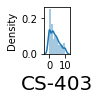

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


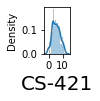

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


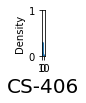

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


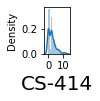

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


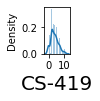

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


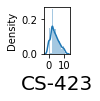

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


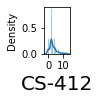

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Temp/ipykernel_1976/49188110.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


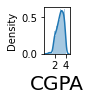

In [94]:
plt.figure(figsize=(20,15),facecolor="red")
plotnumber=1
for column in df:
    if plotnumber<=44:
        ax=plt.subplot(4,11,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
    plt.tight_layout()
    plt.show()

In [103]:
import seaborn as sns

In [104]:
corr=df.corr()

In [105]:
corr

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,0.068592,-0.044036,-0.263444,-0.261563,-0.200722,0.000623,-0.311303,-0.034679,0.041367,...,-0.460327,-0.067172,-0.420260,-0.218206,0.372300,0.483884,-0.124479,-0.007148,0.367683,0.054342
PH-121,0.068592,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,-0.044036,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,-0.263444,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,-0.261563,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,-0.200722,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.000623,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,-0.311303,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,-0.034679,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.041367,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829


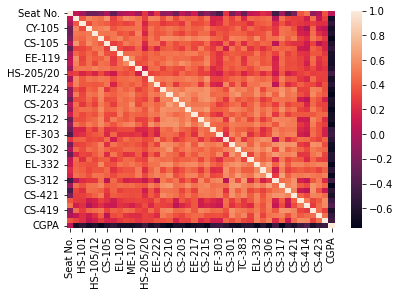

In [109]:
sns.heatmap(df.corr())
plt.show()

In [111]:
from sklearn.preprocessing import StandardScaler

In [113]:
y=df["CGPA"]
x=df.drop(columns=["CGPA"])

In [114]:
# Scaling

scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[-1.7290201 ,  0.40040198,  1.77089951, ...,  1.74051347,
        -0.34612103, -0.45017773],
       [-1.72295336, -1.24205154,  1.4115592 , ...,  0.90041779,
         0.72798282, -0.02104337],
       [-1.71688662, -1.24205154, -0.74448263, ..., -1.61986925,
        -0.70415565, -1.30844646],
       ...,
       [ 1.71688662, -0.25657943, -1.82250355, ...,  0.06032211,
        -0.70415565, -0.45017773],
       [ 1.72295336, -1.24205154, -0.38514232, ..., -0.35972573,
         0.3699482 ,  1.26635973],
       [ 1.7290201 ,  0.72889268,  1.4115592 , ...,  0.06032211,
         1.80208667,  2.12462846]])

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# train & test 
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=49)
y_train.head()

379    3.621
400    2.451
436    3.730
273    2.391
238    3.353
Name: CGPA, dtype: float64

In [122]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [125]:
lr.fit(x_train,y_train)

LinearRegression()

In [126]:
#training score
lr.score(x_train,y_train)

0.9216860435263895

In [145]:
# testing Score
y_pred=lr.predict(x_test)

In [135]:
from sklearn.metrics import r2_score

In [137]:
print(r2_score(y_test,y_pred))

0.9515236352244172


In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [144]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

In [147]:
print(mse)

0.016279146361896993


In [141]:
# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)


In [148]:
print(rmse)

0.1275897580603435


In [142]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

In [149]:
print(mae)

0.10276254109674816


In [146]:
# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)

In [150]:
r2

0.9515236352244172

In [ ]:
# we have less error .& good r2 score.
hence Accuracy score is 95%


In [151]:
import pickle

In [152]:
filename='students grade_file.pkl'
pickle.dump('students grade',open(filename,'wb'))